## Question 1 report

Our data consisting of closing prices of 494 financial assets (in Yahoo) over 2018-2019 (weekdays, totally 502 days). We aim to study the distribution of log returns ($=log(V_{i+1})-log(V_{i})$) and the autocorrelation structue of returns ($=\frac{V_{i+1} - V_{i}}{V_{i}}$) and squared returns ($ =(\frac{V_{i+1} - V_{i}}{V_{i}})^2$).

### Whether the log returns series is normally distributed?
We import normaltest from scipy.stats as our hypothesis test. The null hypothesis is the given data is normally distributd. We test against all 494 series of datas and store their p-values. The smaller the p-value, the stronger the evidence that we should reject the null hypothesis. Only three give p-values greater than 0.01 - they are 0.01087315, 0.01022545, 0.01522586, the rest are even smaller, so we tend to reject the null hypothesis and conclude log returns series are not normally distributed.

### Whether there is a significant autocorrelative structure in the returns and squared returns at one or two lags?
* Returns
    We calculate the acf for time lag = 1 and 2 for all 494 series of returns. The maximum, minimum and mean of the absolute values of acf's for time lag = 1 and 2 respectively are summarised below.
    | The time lag of acf | Max | Min  | Mean|  
    | :---:    |    :----:   |   :---: | :---: |
    | 1  | 0.13831691     | 0.00021894    |0.03685135 |  
    | 2 | 0.12257578         | 0.00052399      | 0.04335074 |  


In [100]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import normaltest

In [2]:
sp_df = pd.read_csv('SP500.csv')
sp_df

,Symbol
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV
...,...
500,YUM
501,ZBH
502,ZBRA
503,ZION


In [7]:
start_date = '2018-01-01'
end_date = '2019-12-31'
allData = pd.DataFrame()
l_sp = len(sp_df)
for i in range(l_sp):
    tick = sp_df['Symbol'][i]
    print(tick)
    try:
        temp = pdr.DataReader(tick,'yahoo',start_date,end_date)['Adj Close']
        if(len(temp)<500):
            continue
        else:
            allData[tick]= temp
    except:
        print('Failed:',tick)
        continue

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBY
BDX
BEN
BF.B
Failed: BF.B
BIIB
BIO
BK
BKNG
BKR
BLK
BLL
BMY
BR
BRK.B
Failed: BRK.B
BSX
BWA
BXP
C
CAG
CAH
CARR
Failed: CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDNS
CDW
CE
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTLT
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DOW
DPZ
DRE
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HFC
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY


In [8]:
allData

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.985886,51.647556,104.916702,41.105534,83.713142,89.101776,192.490005,55.908627,146.872910,177.699997,...,64.657593,72.152405,65.617424,26.204731,65.562332,77.736656,121.328224,103.709999,46.599628,70.489136
2018-01-03,67.664825,51.014027,105.866096,41.098373,85.023140,89.433365,195.820007,56.032253,147.550751,181.039993,...,65.953041,73.569473,65.392639,26.169041,66.361748,77.669975,122.169281,105.769997,46.544483,70.813225
2018-01-04,67.157242,51.335667,109.772415,41.289268,84.538277,89.234398,199.250000,55.937157,149.297852,183.220001,...,67.143723,73.671303,65.382851,26.490240,66.804810,78.460663,121.993256,107.860001,46.737503,71.235565
2018-01-05,68.230972,51.316177,110.939346,41.759361,86.009903,90.314545,202.320007,56.098827,150.529449,185.339996,...,70.629974,73.611900,66.301537,26.686533,66.679596,78.917931,123.205963,109.540001,46.755882,72.050766
2018-01-08,68.377396,50.809345,110.158089,41.604263,84.631821,91.811577,207.800003,55.937157,151.732376,185.039993,...,71.096703,73.942833,66.751122,26.998810,66.920395,79.051315,123.440674,110.629997,46.526104,72.915047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,84.573769,29.072563,159.305710,69.886818,85.136879,83.924896,172.300003,85.925331,208.266663,329.640015,...,97.003059,64.841568,56.681000,35.554531,77.613426,98.878494,149.679855,254.330002,49.653328,132.162842
2019-12-26,84.722496,29.560759,158.015945,71.273392,85.117928,83.561386,171.009995,85.925331,208.699707,331.200012,...,97.190186,64.943436,56.105358,35.659187,77.573936,100.317375,149.351959,254.419998,49.778591,132.272202
2019-12-27,84.692741,28.335287,157.103195,71.246353,84.520973,83.423828,169.270004,86.043480,208.867004,330.790009,...,96.934113,64.721184,56.413033,35.497444,77.810806,100.425781,149.063782,256.000000,49.624416,132.490967


In [17]:
logdiffdata = np.log(allData).diff().dropna() #shape = (502,494)

In [56]:
row_no = (logdiffdata.shape)[0]
col_no = (logdiffdata.shape)[1]
norm_test_p = np.zeros(col_no)
for i in range(col_no):
    _,p=normaltest(logdiffdata.iloc[:,i])
    norm_test_p[i]=p

False

In [65]:
np.argmin(norm_test_p)

159

In [58]:
norm_test_p[norm_test_p>0.01]

array([0.01087315, 0.01022545, 0.01522586])

In [63]:
np.array(range(col_no))[norm_test_p>0.01]

array([ 71, 154, 271])

In [66]:
norm_test_p[159]

6.114495548878629e-218

<AxesSubplot:xlabel='Date'>

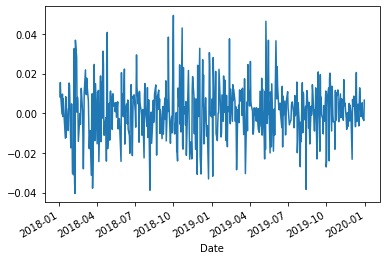

In [50]:
logdiffdata.iloc[:,271].plot()

In [68]:
data_try1 = logdiffdata.iloc[:,271].values
v1 = np.var(data_try1)
data_try2 = logdiffdata.iloc[:,159].values
v2 = np.var(data_try2)

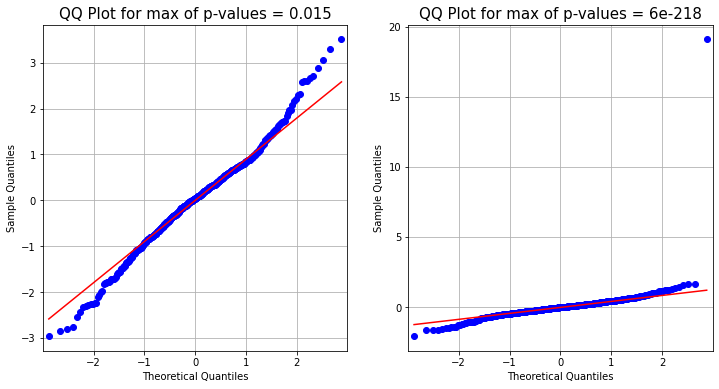

In [80]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
ax = axes.flatten()

sm.qqplot(data_try1, fit = True, line = 'q', scale = np.sqrt(v1),ax=ax[0])
ax[0].set_title('QQ Plot for max of p-values = 0.015', fontsize=15)
ax[0].grid()

sm.qqplot(data_try2, fit = True, line = 'q', scale = np.sqrt(v2),ax=ax[1])
ax[1].set_title('QQ Plot for max of p-values = 6e-218', fontsize=15)
ax[1].grid()

In [99]:
acf(data_try,nlags=2,fft=False)

array([ 1.        , -0.02171971, -0.07586013])

In [131]:
returns[:,1]

TypeError: '(slice(None, None, None), 1)' is an invalid key

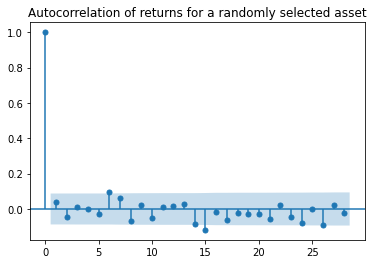

In [132]:
plot_acf(returns.iloc[:,1])
plt.title("Autocorrelation of returns for a randomly selected asset")
plt.show()

In [93]:
(allData.iloc[:-1,:])

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.985886,51.647556,104.916702,41.105534,83.713142,89.101776,192.490005,55.908627,146.872910,177.699997,...,64.657593,72.152405,65.617424,26.204731,65.562332,77.736656,121.328224,103.709999,46.599628,70.489136
2018-01-03,67.664825,51.014027,105.866096,41.098373,85.023140,89.433365,195.820007,56.032253,147.550751,181.039993,...,65.953041,73.569473,65.392639,26.169041,66.361748,77.669975,122.169281,105.769997,46.544483,70.813225
2018-01-04,67.157242,51.335667,109.772415,41.289268,84.538277,89.234398,199.250000,55.937157,149.297852,183.220001,...,67.143723,73.671303,65.382851,26.490240,66.804810,78.460663,121.993256,107.860001,46.737503,71.235565
2018-01-05,68.230972,51.316177,110.939346,41.759361,86.009903,90.314545,202.320007,56.098827,150.529449,185.339996,...,70.629974,73.611900,66.301537,26.686533,66.679596,78.917931,123.205963,109.540001,46.755882,72.050766
2018-01-08,68.377396,50.809345,110.158089,41.604263,84.631821,91.811577,207.800003,55.937157,151.732376,185.039993,...,71.096703,73.942833,66.751122,26.998810,66.920395,79.051315,123.440674,110.629997,46.526104,72.915047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,84.534111,29.192120,158.710449,69.820442,85.515892,84.101753,170.440002,85.994247,207.498978,328.950012,...,97.406868,65.091606,56.651279,35.535500,77.919365,98.366020,150.046967,256.730011,49.470245,131.615967
2019-12-24,84.573769,29.072563,159.305710,69.886818,85.136879,83.924896,172.300003,85.925331,208.266663,329.640015,...,97.003059,64.841568,56.681000,35.554531,77.613426,98.878494,149.679855,254.330002,49.653328,132.162842
2019-12-26,84.722496,29.560759,158.015945,71.273392,85.117928,83.561386,171.009995,85.925331,208.699707,331.200012,...,97.190186,64.943436,56.105358,35.659187,77.573936,100.317375,149.351959,254.419998,49.778591,132.272202


In [96]:
returns = (allData).diff().dropna()
returns = pd.DataFrame(returns.values/(allData.iloc[:-1,:].values),columns=returns.columns)

In [103]:

acf_values = np.zeros((col_no,2))
for i in range(col_no):
    acf_values[i,:]=acf(returns.iloc[:,i],fft = False,nlags=2)[1:]
acf_values

array([[-0.05430463,  0.02276365],
       [ 0.03957683, -0.04382959],
       [-0.13328678, -0.00755869],
       [-0.00858735, -0.06053164],
       [ 0.04654375, -0.08441253],
       [ 0.01220342, -0.02633148],
       [ 0.04709452,  0.01478687],
       [-0.00206298, -0.11516115],
       [ 0.00130642, -0.12833682],
       [-0.11692568, -0.08808866],
       [-0.03826873, -0.10055906],
       [ 0.03064902, -0.00425916],
       [-0.05556479, -0.07916559],
       [-0.04939038, -0.00052399],
       [ 0.03726061, -0.06159279],
       [ 0.04706137, -0.10618873],
       [-0.01800347, -0.05228785],
       [-0.02542609, -0.04313303],
       [ 0.04627237,  0.05513881],
       [-0.03085104, -0.07158694],
       [ 0.06231469, -0.04621008],
       [ 0.00147427, -0.07542746],
       [ 0.01147454, -0.08928066],
       [ 0.00510935,  0.04616874],
       [ 0.05419344,  0.04144802],
       [-0.05940472, -0.0441672 ],
       [-0.0793344 , -0.02843739],
       [-0.03503598,  0.07513233],
       [-0.02096178,

In [105]:
np.max(abs(acf_values),axis=0)

array([0.13831691, 0.12257578])

In [107]:
np.min(abs(acf_values),axis=0)

array([0.00021894, 0.00052399])

In [108]:
np.mean(abs(acf_values),axis=0)

array([0.03685135, 0.04335074])

In [111]:
returns_squared = np.square(returns)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,6.473932e-04,1.504646e-04,0.000082,3.034227e-08,2.448802e-04,0.000014,0.000299,4.889528e-06,2.129965e-05,0.000353,...,4.014219e-04,3.857270e-04,1.173534e-05,1.854988e-06,1.486745e-04,7.357856e-07,0.000048,3.945410e-04,1.400398e-06,2.113900e-05
1,5.627160e-05,3.975218e-05,0.001362,2.157447e-05,3.252103e-05,0.000005,0.000307,2.880406e-06,1.402016e-04,0.000145,...,3.259279e-04,1.915809e-06,2.240659e-08,1.506516e-04,4.457517e-05,1.036343e-04,0.000002,3.904534e-04,1.719759e-05,3.557103e-05
2,2.556259e-04,1.441297e-07,0.000113,1.296262e-04,3.030319e-04,0.000147,0.000237,8.353371e-06,6.805041e-05,0.000134,...,2.695918e-03,6.501480e-07,1.974269e-04,5.490821e-05,3.513077e-06,3.396544e-05,0.000099,2.426040e-04,1.546403e-07,1.309590e-04
3,4.605295e-06,9.754829e-05,0.000050,1.379445e-05,2.567163e-04,0.000275,0.000734,8.305294e-06,6.386094e-05,0.000003,...,4.366666e-05,2.021078e-05,4.598078e-05,1.369289e-04,1.304137e-05,2.856674e-06,0.000004,9.901582e-05,2.415158e-05,1.438906e-04
4,6.028943e-04,9.197860e-07,0.000065,1.319917e-08,5.683097e-05,0.000041,0.000089,2.890208e-06,1.112154e-05,0.000080,...,7.180474e-06,1.802805e-05,1.741219e-03,5.350993e-06,8.280220e-08,7.029281e-06,0.000259,9.389737e-04,5.526483e-04,1.373328e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2.200841e-07,1.677315e-05,0.000014,9.037607e-07,1.964331e-05,0.000004,0.000119,6.422519e-07,1.368781e-05,0.000004,...,1.718589e-05,1.475579e-05,2.752245e-07,2.868285e-07,1.541623e-05,2.714273e-05,0.000006,8.739217e-05,1.369638e-05,1.726470e-05
498,3.092507e-06,2.819816e-04,0.000066,3.936366e-04,4.955048e-08,0.000019,0.000056,0.000000e+00,4.323400e-06,0.000022,...,3.721330e-06,2.468117e-06,1.031405e-04,8.664434e-06,2.588779e-07,2.117610e-04,0.000005,1.252145e-07,6.364296e-06,6.846935e-07
499,1.233423e-07,1.718602e-03,0.000033,1.439172e-07,4.918585e-05,0.000003,0.000104,1.890672e-06,6.425908e-07,0.000002,...,6.941970e-06,1.171171e-05,3.007281e-05,2.057354e-05,9.323689e-06,1.167763e-06,0.000004,3.856672e-05,9.592717e-06,2.735392e-06
500,1.590833e-05,2.423304e-05,0.000024,3.522624e-05,5.811408e-05,0.000224,0.000137,4.712978e-05,5.542971e-05,0.000055,...,5.653239e-05,3.441263e-05,5.992463e-05,1.863872e-05,1.608794e-06,1.528959e-04,0.000071,5.450589e-05,2.748676e-05,6.091577e-05


(array([ 2.,  0.,  1.,  1.,  1.,  2.,  1.,  4.,  6.,  7., 12.,  8.,  9.,
        15., 24., 26., 24., 34., 33., 30., 35., 24., 36., 27., 23., 24.,
        20., 17., 12.,  8., 11.,  6.,  0.,  4.,  2.,  1.,  2.,  1.,  0.,
         1.]),
 array([-0.15925504, -0.15181574, -0.14437644, -0.13693715, -0.12949785,
        -0.12205855, -0.11461925, -0.10717995, -0.09974065, -0.09230135,
        -0.08486205, -0.07742275, -0.06998346, -0.06254416, -0.05510486,
        -0.04766556, -0.04022626, -0.03278696, -0.02534766, -0.01790836,
        -0.01046906, -0.00302977,  0.00440953,  0.01184883,  0.01928813,
         0.02672743,  0.03416673,  0.04160603,  0.04904533,  0.05648463,
         0.06392392,  0.07136322,  0.07880252,  0.08624182,  0.09368112,
         0.10112042,  0.10855972,  0.11599902,  0.12343832,  0.13087761,
         0.13831691]),
 <BarContainer object of 40 artists>)

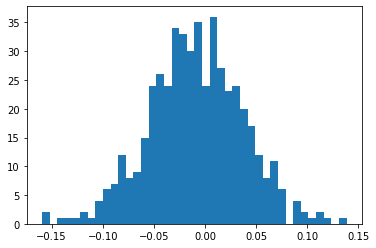

In [117]:
plt.hist(acf_values[:,0],bins=40)

In [112]:
acf_squred_values = np.zeros((col_no,2))
for i in range(col_no):
    acf_squred_values[i,:]=acf(returns_squared.iloc[:,i],fft = False,nlags=2)[1:]
acf_squred_values

array([[ 6.98425355e-02,  5.72568254e-02],
       [ 5.18348376e-02,  6.24744985e-02],
       [ 7.12746343e-02,  1.24718395e-02],
       [ 9.21785700e-02,  3.54191393e-02],
       [ 1.48693494e-02,  4.08871731e-02],
       [-8.92970605e-04,  2.71655993e-02],
       [-8.03093990e-03, -1.45579170e-02],
       [ 1.24438797e-01,  2.30038226e-02],
       [ 1.63678972e-01,  1.35957031e-01],
       [ 1.03673589e-01,  1.32888231e-01],
       [ 4.74316898e-02, -3.46395155e-03],
       [ 9.87361297e-02,  7.12809874e-02],
       [ 1.66210594e-01,  8.68798889e-02],
       [-1.60238176e-02,  5.17922653e-02],
       [-8.34918487e-03, -5.57147032e-03],
       [ 2.29439084e-03,  5.90351962e-05],
       [ 9.61684914e-02,  6.88343887e-02],
       [ 7.86783206e-02,  1.24883436e-02],
       [ 1.86294420e-01,  7.35360086e-02],
       [ 1.04010349e-01, -3.01928828e-02],
       [ 9.69329178e-02,  1.14801135e-02],
       [ 8.08932047e-02,  1.64931549e-02],
       [-1.03913104e-02,  8.61252388e-03],
       [ 1.

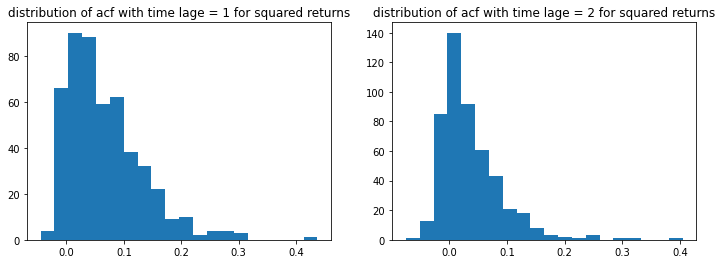

In [126]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(acf_squred_values[:,0],bins=20)
plt.title("distribution of acf with time lage = 1 for squared returns")

plt.subplot(1,2,2)
plt.hist(acf_squred_values[:,1],bins=20)
plt.title("distribution of acf with time lage = 2 for squared returns")
plt.show()

In [140]:
np.argmax(abs(acf_squred_values[:,0]))

150

In [142]:
np.argmax(abs(acf_squred_values[:,1]))

145

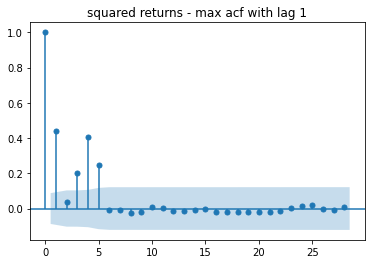

In [134]:
plot_acf(returns_squared.iloc[:,150])
plt.title("squared returns - max acf with lag 1")
plt.show()

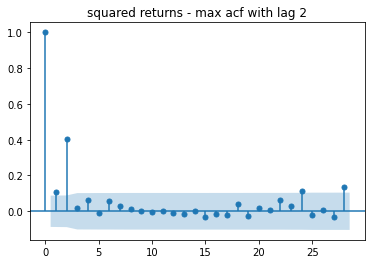

In [143]:
plot_acf(returns_squared.iloc[:,145])
plt.title("squared returns - max acf with lag 2")
plt.show()

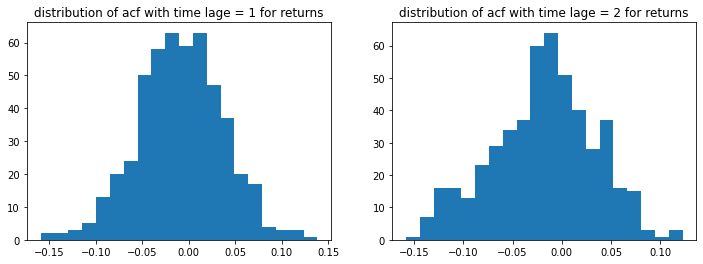

In [127]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(acf_values[:,0],bins=20)
plt.title("distribution of acf with time lage = 1 for returns")

plt.subplot(1,2,2)
plt.hist(acf_values[:,1],bins=20)
plt.title("distribution of acf with time lage = 2 for returns")
plt.show()